In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
hr = pd.read_csv('/content/drive/MyDrive/ET.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr=hr.rename(columns = {'sales':'department'})

In [5]:
hr.shape

(14999, 10)

In [6]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [8]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [9]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [10]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [13]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low']
X=hr[cols]
y=hr['left']

In [17]:
# Correct import for train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import Logistic Regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the values for the test set
y_pred = logreg.predict(X_test)

# Evaluate model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7704444444444445


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier with default settings
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the accuracy score
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))


Random Forest Accuracy: 0.979


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3428
           1       0.96      0.95      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



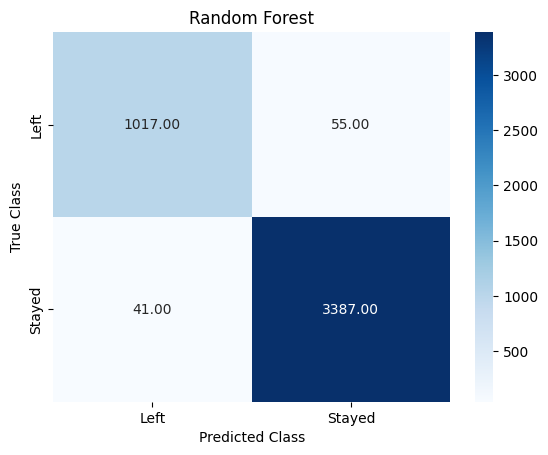

Text(0.5, 1.0, 'Random Forest')

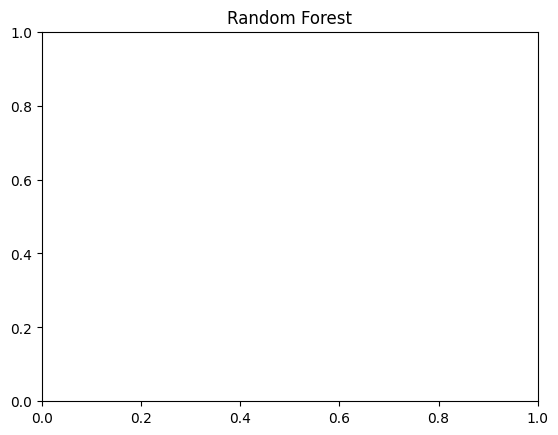

In [27]:

import matplotlib.pyplot as plt  # Import matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Compute the confusion matrix
forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plot the heatmap
sns.heatmap(forest_cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])

# Set plot labels and title
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Random Forest')

# Display the plot
plt.show()

plt.title('Random Forest')

In [28]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.50      0.25      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.65      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



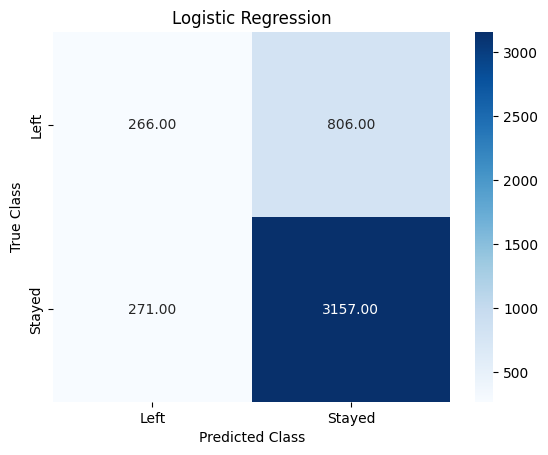

In [30]:
import matplotlib.pyplot as plt  # Import plt if not already imported
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions using Logistic Regression
logreg_y_pred = logreg.predict(X_test)

# Compute the confusion matrix (correct order: y_test, y_pred)
logreg_cm = confusion_matrix(y_test, logreg_y_pred, labels=[1, 0])

# Plot the heatmap
sns.heatmap(logreg_cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])

# Set plot labels and title
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')

# Display the plot
plt.show()


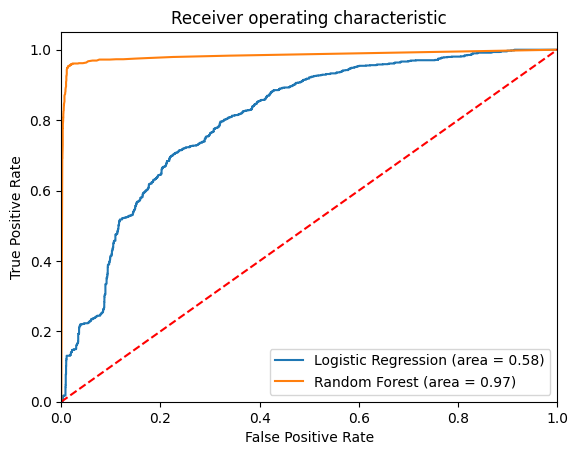

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.22%
department_management-0.27%
department_hr-0.31%
department_RandD-0.34%
salary_high-0.77%
salary_low-1.17%
Work_accident-1.46%
last_evaluation-18.57%
time_spend_company-26.67%
satisfaction_level-50.23%
